# Data øvelser med Numpy, Pandas og MatPlotLib

Her er en række øvelser, hvor vi skal blive bedre til at håndtere nogle af de mest bruge databehandling og visualleringspakker i Python. I må gerne bruge alternativer til de ovenstående pakker, men det anbefales at bruge de ovenstående, da de er de mest anvendte.


# Simulering af Møntkast og Statistisk Analyse
I denne opgave skal I simulere et stort antal møntkast og analysere resultaterne statistisk. Formålet er at få erfaring med at skrive Python-kode til simulering og at anvende grundlæggende statistiske principper.

### Opgavebeskrivelse

Simulér Møntkast: Skriv en Python-funktion, der simulerer et møntkast. Mønten kan enten lande på "Plat" eller "Krone".
Gentag Simulationen: Kast mønten mange gange (for eksempel 10.000 gange) og optæl, hvor mange gange mønten lander på "Plat" og "Krone".
#### Statistisk Analyse:
Beregn sandsynligheden for at få "Plat" og "Krone" ud fra simulationen.

Beregn den gennemsnitlige forekomst af "Plat" pr. 100 kast.

Lav en grafisk visualisering af sandsynligheden som en funktion af antal kast.

Undersøg, hvordan variationen ændrer sig over tid. F.eks. hvordan sandsynligheden konvergerer mod 50% efter mange kast.

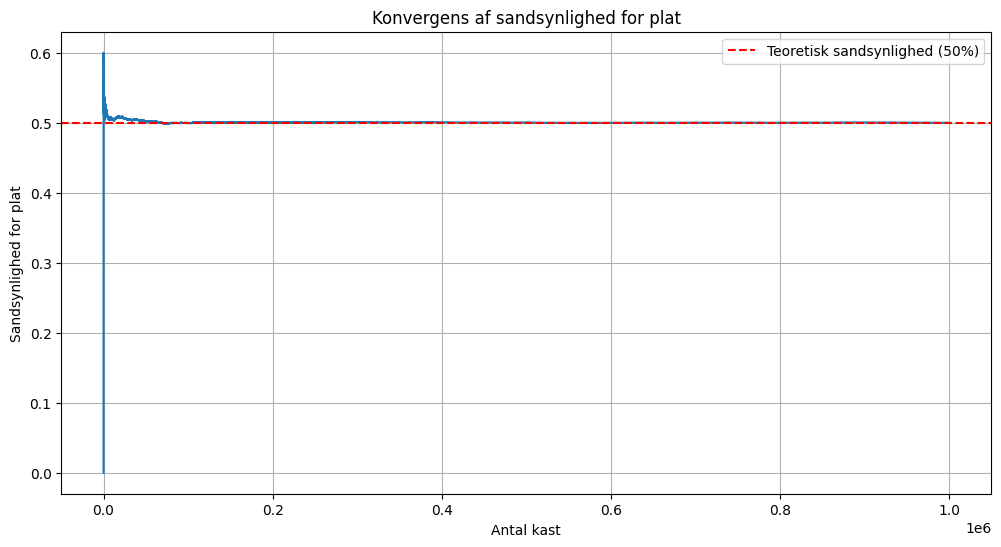

Antal plat: 499910
Antal krone: 500090
Sandsynlighed for plat: 0.500
Sandsynlighed for krone: 0.500
Gennemsnitligt antal plat pr. 100 kast: 49.99


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def coin_flip(antal_kast):
    # Simuler møntkast (0 for plat, 1 for krone)
    kast = np.random.randint(0, 2, antal_kast)
    return kast

def beregn_sandsynligheder(kast):
    # Beregn løbende sandsynlighed for plat
    kumulativ_sum = np.cumsum(kast == 0)
    antal_kast = np.arange(1, len(kast) + 1)
    sandsynligheder = kumulativ_sum / antal_kast
    return sandsynligheder

# Simuler 1.000.000 kast
antal_kast = 1_000_000
resultater = coin_flip(antal_kast)

# Beregn statistik
antal_plat = np.sum(resultater == 0)
antal_krone = np.sum(resultater == 1)
sandsynlighed_plat = antal_plat / antal_kast
sandsynlighed_krone = antal_krone / antal_kast

# Beregn gennemsnit pr. 100 kast
antal_grupper = antal_kast // 100
plat_pr_100 = np.array([np.sum(resultater[i*100:(i+1)*100] == 0) 
                        for i in range(antal_grupper)])
gennemsnit_plat_pr_100 = np.mean(plat_pr_100)

# Visualisering
plt.figure(figsize=(12, 6))
plt.plot(beregn_sandsynligheder(resultater))
plt.axhline(y=0.5, color='r', linestyle='--', label='Teoretisk sandsynlighed (50%)')
plt.xlabel('Antal kast')
plt.ylabel('Sandsynlighed for plat')
plt.title('Konvergens af sandsynlighed for plat')
plt.legend()
plt.grid(True)
plt.show()

# Udskriv resultater
print(f"Antal plat: {antal_plat}")
print(f"Antal krone: {antal_krone}")
print(f"Sandsynlighed for plat: {sandsynlighed_plat:.3f}")
print(f"Sandsynlighed for krone: {sandsynlighed_krone:.3f}")
print(f"Gennemsnitligt antal plat pr. 100 kast: {gennemsnit_plat_pr_100:.2f}")

## Analyser og visualiser data for politistop

### Trin 1: Data Cleaning og Forberedelse (Pandas)
**Rens data:**

    - Fjern rækker med manglende værdier i driver_gender, violation, og stop_outcome, da disse kolonner er afgørende for analysen.

    - Konverter stop_date til en datetime-type, og udtræk år og måned som nye kolonner.
    
**Alderberegning:**

    - Hvis driver_age_raw er fødselsår, brug NumPy til at beregne alderen (antag, at dataene er fra 2021). Tilføj en ny kolonne age.

### Trin 2: Analyse (NumPy og Pandas)

**Fordeling af Aldersgrupper:**

    - Del alderskolonnen op i grupper, fx <20, 20-29, 30-39, osv. Brug NumPy til at definere disse intervaller og Pandas til at gruppere dataene.

    - Beregn det gennemsnitlige antal stops pr. aldersgruppe.

**Køns- og Racefordeling:**
    - Analyser forholdet mellem driver_gender og violation, dvs. hvilke typer af overtrædelser er mest almindelige for hver køn.
    - Brug Pandas til at tælle antallet af trafikstops pr. race og køn.

### Trin 3: Visualisering (Matplotlib)

**Søjlediagram for aldersfordeling:**

    - Lav et søjlediagram for antallet af trafikstops pr. aldersgruppe.

**Køns- og racefordeling:**

    - Visualiser fordelingen af køn og race for trafikstops i et stablet søjlediagram.

**Overtrædelser fordelt på køn:**

    - Lav et søjlediagram, der viser de mest almindelige typer af overtrædelser for hvert køn.


Lav en beskrivelse af de fundne resultater, og hvad de betyder for politistop analysen.


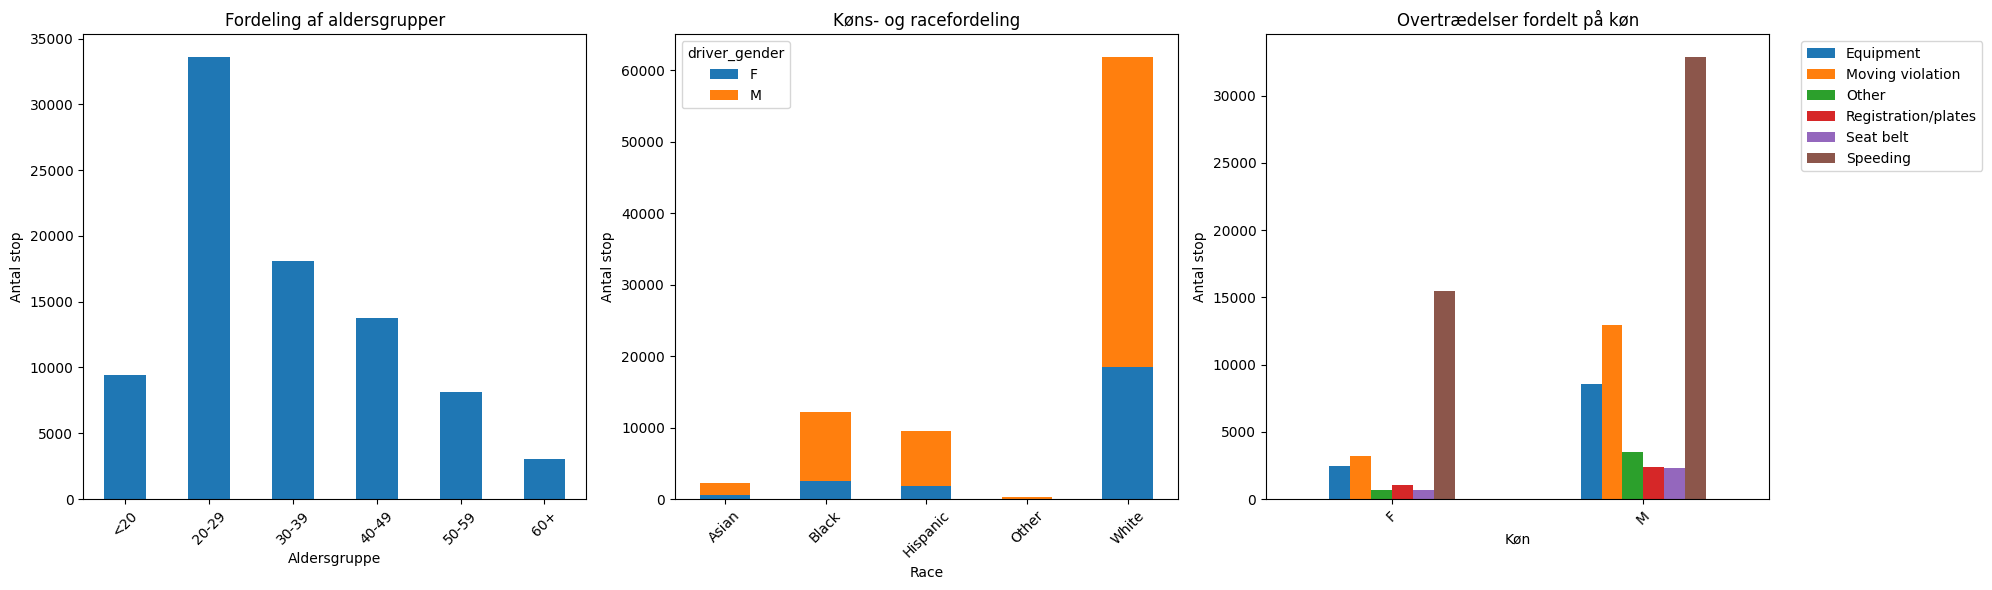


Gennemsnitligt antal stop pr. aldersgruppe:
age_group
<20       9390
20-29    33630
30-39    18116
40-49    13762
50-59     8157
60+       3058
Name: count, dtype: int64

Top 3 overtrædelser for hver køn:

M:
violation
Speeding            32906
Moving violation    12969
Equipment            8523
Name: count, dtype: int64

F:
violation
Speeding            15453
Moving violation     3195
Equipment            2484
Name: count, dtype: int64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Indlæs data
df = pd.read_csv('Data/Police/police.csv')

# Rens data - lav en kopi i stedet for en view
df_clean = df.dropna(subset=['driver_gender', 'violation', 'stop_outcome']).copy()

# Konverter stop_date til datetime og tilføj år/måned
df_clean['stop_date'] = pd.to_datetime(df_clean['stop_date'], format='%Y-%m-%d', errors='coerce')
df_clean['year'] = pd.DatetimeIndex(df_clean['stop_date']).year
df_clean['month'] = pd.DatetimeIndex(df_clean['stop_date']).month

# Fjern rækker med manglende alder
df_clean = df_clean[df_clean['driver_age'].notna()]

# Lav aldersgrupper
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df_clean['age_group'] = pd.cut(df_clean['driver_age'], bins=bins, labels=labels)

# Analyse af aldersgrupper
age_counts = df_clean['age_group'].value_counts().sort_index()

# Køns- og overtrædelsesanalyse
gender_violation = pd.crosstab(df_clean['driver_gender'], df_clean['violation'])
race_gender = pd.crosstab(df_clean['driver_race'], df_clean['driver_gender'])

# Opret figure og axes objekter explicit
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# 1. Aldersfordeling
age_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Fordeling af aldersgrupper')
ax1.set_xlabel('Aldersgruppe')
ax1.set_ylabel('Antal stop')
ax1.tick_params(axis='x', rotation=45)

# 2. Køns- og racefordeling
race_gender.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Køns- og racefordeling')
ax2.set_xlabel('Race')
ax2.set_ylabel('Antal stop')
ax2.tick_params(axis='x', rotation=45)

# 3. Overtrædelser fordelt på køn
gender_violation.plot(kind='bar', ax=ax3)
ax3.set_title('Overtrædelser fordelt på køn')
ax3.set_xlabel('Køn')
ax3.set_ylabel('Antal stop')
ax3.tick_params(axis='x', rotation=45)
ax3.legend(bbox_to_anchor=(1.05, 1))

# Juster layout for at undgå overlap
plt.tight_layout()
plt.show()

# Udskriv statistik
print("\nGennemsnitligt antal stop pr. aldersgruppe:")
print(age_counts)

print("\nTop 3 overtrædelser for hver køn:")
for gender in ['M', 'F']:
    print(f"\n{gender}:")
    print(df_clean[df_clean['driver_gender'] == gender]['violation'].value_counts().head(3))

# Porteføljeoptimering og Analyse af S&P 500 Aktier
I denne opgave vil I arbejde med historiske aktiedata for top 50 aktier i S&P 500. Jeres mål er at forstå, hvordan disse aktier har udviklet sig over de sidste 10 år fra (2014-10-28 til 2024-10-27) og bruge denne indsigt til at sammensætte en portefølje, som giver det bedste afkast.

Lav kode til datahåndtering og visualisering samt udvikl en strategi for at maksimere jeres porteføljes værdi. Husk, at der er begrænsninger på, hvor meget I kan investere i hver aktie.

**Trin 1: Dataanalyse og Visualisering**
Hent data: Start med at indlæse aktiedataene (filen Stocks.csv).

    Normalisering: Normaliser lukkepriserne for de udvalgte aktier, så alle starter på en basisværdi af 100. Dette vil hjælpe jer med at se den procentvise udvikling over tid.

    Visualisering: Brug en logaritmisk skala til at plotte udviklingen af hver aktie over tid. Dette giver jer en idé om, hvilke aktier der har haft størst vækst eller mindst volatilitet.

Kodevejledning: Følg de trin og kodeeksempler, vi har gennemgået, for at lave en overskuelig graf over aktiernes udvikling over tid. Der er også en starterkode, nedenfor!

**Trin 2: Porteføljedesign**

Regler for porteføljen:

    I må maksimalt investere 22% af jeres samlede portefølje i én enkelt aktie.
    Resten af jeres investering skal fordeles mellem de andre aktier, men uden at bryde 22%-reglen.
    Mål: Jeres mål er at maksimere værdien af jeres portefølje ved udgangen af de 10 år, baseret på de historiske data.

    Porteføljesammensætning: Vælg en sammensætning af aktier, der balancerer risiko og afkast. Husk at tage højde for, hvordan aktierne har udviklet sig og deres volatilitet.

Tip: Brug både data fra normaliserede og log-skalerede grafer til at identificere aktier med stabile og høje vækstrater.

**Trin 3: Implementering og Beregning af Afkast**

Implementer jeres strategi: Skriv kode til at simulere jeres porteføljes afkast over de 10 år, givet jeres valg af investeringer og procentfordeling.
Afkastberegning: Udregn det samlede afkast af jeres portefølje over de 10 år. I kan for eksempel opdatere porteføljens værdi hvert år og analysere, hvordan jeres valg har påvirket den langsigtede vækst.
Sammenligning: Del jeres resultater med de andre grupper og sammenlign, hvem der har opnået det bedste afkast. Diskutér, hvilke faktorer og strategier der førte til de forskellige resultater.

C:\Users\MAGS\AppData\Local\Temp\ipykernel_29524\3015423740.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks = stocks.fillna(method='ffill')


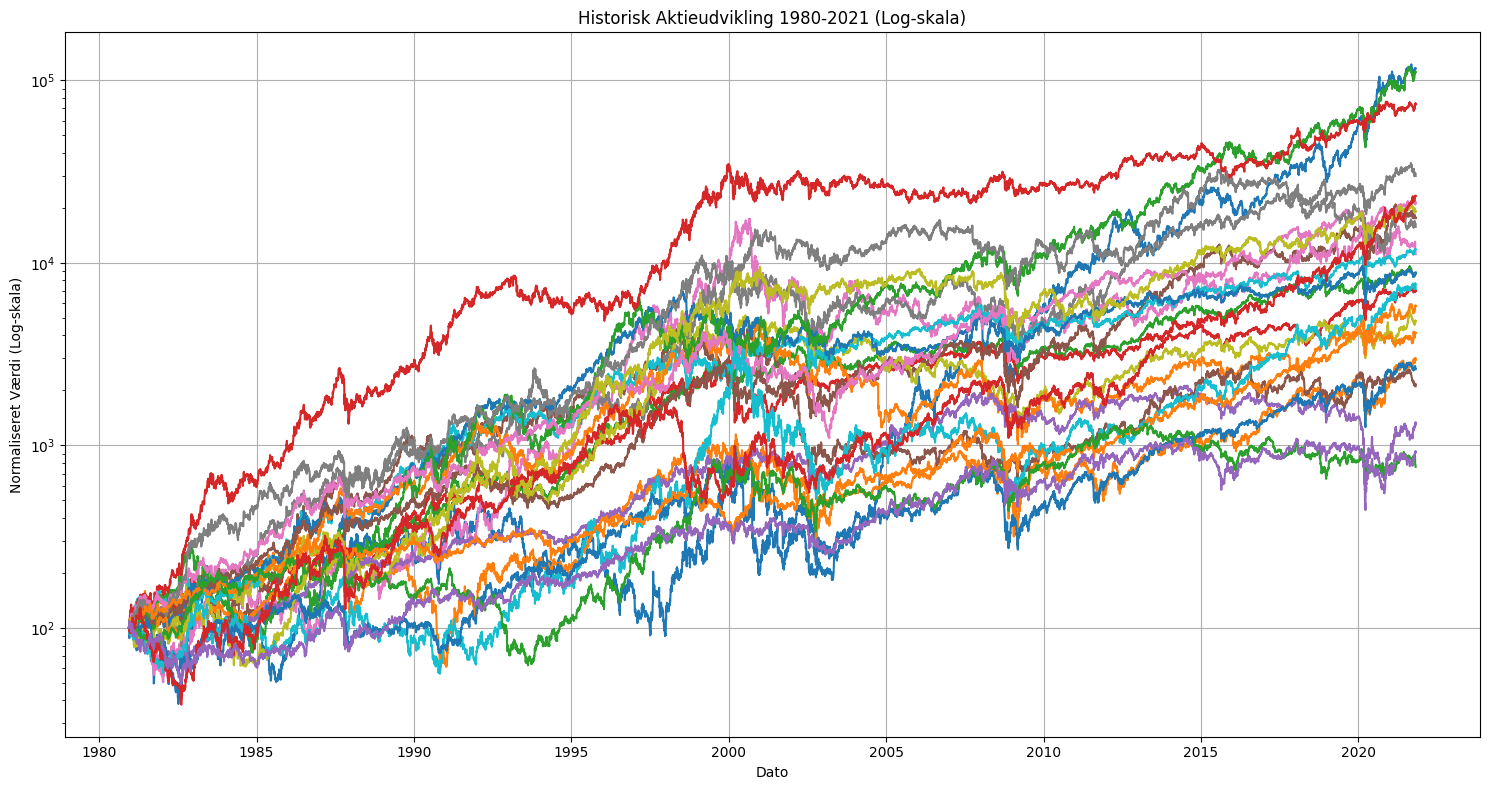

C:\Users\MAGS\AppData\Local\Temp\ipykernel_29524\3015423740.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocksnew = stocksnew.fillna(method='ffill')


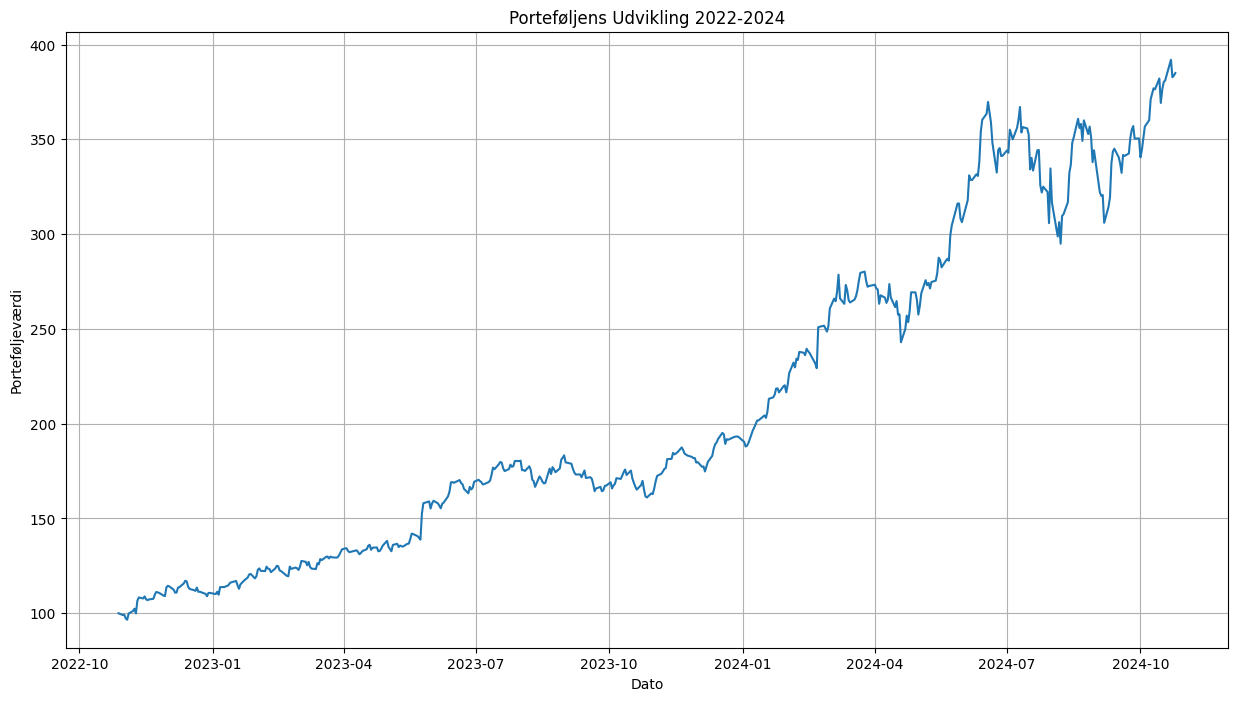


Porteføljesammensætning:
NVDA: 22.0%
AVGO: 22.0%
PG: 22.0%
PM: 22.0%
JPM: 12.0%

Samlet afkast: 285.0%

Nøgletal for porteføljen:
Gennemsnitligt årligt afkast: 0.3%
Volatilitet: 1.9%
Sharpe ratio: 0.15


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Indlæs data separat
stocks = pd.read_csv('./Data/Stocks/Stocks.csv', index_col=0, parse_dates=True)
stocksnew = pd.read_csv('./Data/Stocks/StocksNew.csv', index_col=0, parse_dates=True)

# Håndter manglende værdier for historiske data (stocks)
min_periods = len(stocks) * 0.95
stocks = stocks.dropna(axis=1, thresh=min_periods)
stocks = stocks.fillna(method='ffill')

# Normaliser historiske aktiekurser
normalized_stocks = stocks.div(stocks.iloc[0]) * 100

# Plot historiske kurser med logaritmisk skala
plt.figure(figsize=(15, 8))
plt.semilogy(normalized_stocks.index, normalized_stocks)
plt.title('Historisk Aktieudvikling 1980-2021 (Log-skala)')
plt.xlabel('Dato')
plt.ylabel('Normaliseret Værdi (Log-skala)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Håndter manglende værdier for nye data (stocksnew)
stocksnew = stocksnew.dropna(axis=1, thresh=len(stocksnew) * 0.95)
stocksnew = stocksnew.fillna(method='ffill')

# Beregn afkast og volatilitet for nye data
annual_returns = stocksnew.pct_change(fill_method=None).resample('Y').mean()
volatility = stocksnew.pct_change(fill_method=None).std()

# Beregn Sharpe ratio for nye data
sharpe_ratio = annual_returns.mean() / volatility

# Vælg top 5 aktier baseret på Sharpe ratio
top_stocks = sharpe_ratio.dropna().sort_values(ascending=False)[:5]

# Lav porteføljefordeling
portfolio = {}
remaining_weight = 1.0
for stock in top_stocks.index:
    weight = min(0.22, remaining_weight)
    portfolio[stock] = weight
    remaining_weight -= weight

# Normaliser vægte
total_weight = sum(portfolio.values())
portfolio = {k: v/total_weight for k, v in portfolio.items()}

# Beregn porteføljens udvikling med nye data
normalized_new = stocksnew.div(stocksnew.iloc[0]) * 100
portfolio_performance = pd.DataFrame(index=stocksnew.index)
portfolio_performance['Value'] = 0

for stock, weight in portfolio.items():
    portfolio_performance['Value'] += normalized_new[stock] * weight

# Plot porteføljens udvikling
plt.figure(figsize=(15, 8))
plt.plot(portfolio_performance.index, portfolio_performance['Value'])
plt.title('Porteføljens Udvikling 2022-2024')
plt.xlabel('Dato')
plt.ylabel('Porteføljeværdi')
plt.grid(True)
plt.show()

# Beregn afkast
first_value = portfolio_performance['Value'].iloc[0]
last_value = portfolio_performance['Value'].iloc[-1]
total_return = (last_value / first_value - 1) * 100

# Udskriv resultater
print("\nPorteføljesammensætning:")
for stock, weight in portfolio.items():
    print(f"{stock}: {weight*100:.1f}%")

print(f"\nSamlet afkast: {total_return:.1f}%")

# Nøgletal for porteføljen
print("\nNøgletal for porteføljen:")
portfolio_returns = portfolio_performance['Value'].pct_change()
annual_portfolio_returns = portfolio_returns.resample('Y').mean()
portfolio_volatility = portfolio_returns.std()
print(f"Gennemsnitligt årligt afkast: {annual_portfolio_returns.mean()*100:.1f}%")
print(f"Volatilitet: {portfolio_volatility*100:.1f}%")
print(f"Sharpe ratio: {(annual_portfolio_returns.mean() / portfolio_volatility):.2f}")